In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load quarterly signals
signals_q = pd.read_csv('../data/engineered_signals.csv', parse_dates=['Date'])
signals_q.set_index('Date', inplace=True)
signals_q = signals_q.resample('Q').mean()

# Simulate profit margin (%) — bounded between 4% and 14%
np.random.seed(42)
margin = pd.DataFrame(index=signals_q.index)
margin['Margin'] = 9 + np.random.normal(0, 2, len(margin)) + signals_q['Auto_YoY'].fillna(0) * 8 - signals_q['CPI_Repo_Spread'].fillna(0) * 2
margin['Margin'] = margin['Margin'].clip(lower=4, upper=14)

# Merge signals and margin
df = pd.concat([signals_q, margin], axis=1).dropna()
print(df.tail())


            Auto_YoY  CPI_Repo_Spread     Margin
Date                                            
2023-12-31  0.187126         0.028571  13.485923
2024-03-31  0.065888        -0.255000   9.568797
2024-06-30 -0.110878         0.028333   7.588037
2024-09-30 -0.061230        -0.055000  11.778588
2024-12-31  0.249748         0.173333  12.186189


/var/folders/vq/67rg32y9779bptdgz21w4ql80000gn/T/ipykernel_33411/2082107877.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  signals_q = signals_q.resample('Q').mean()


📊 Profit Margin Model — R²: -0.207 | RMSE: 4.11%


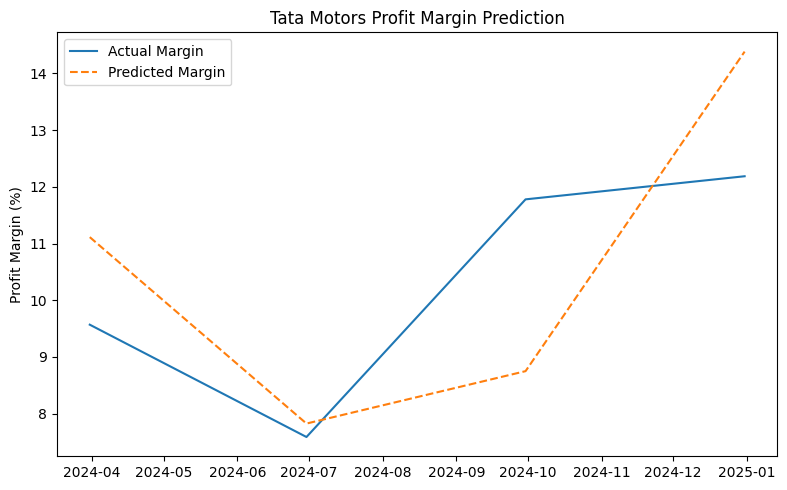

In [6]:
# Split into train/test
train = df[:-4]
test = df[-4:]

X_train, y_train = train.drop(columns='Margin'), train['Margin']
X_test, y_test = test.drop(columns='Margin'), test['Margin']

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, preds)
rmse = mean_squared_error(y_test, preds)

print(f"📊 Profit Margin Model — R²: {r2:.3f} | RMSE: {rmse:.2f}%")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(test.index, y_test, label='Actual Margin')
plt.plot(test.index, preds, label='Predicted Margin', linestyle='--')
plt.title("Tata Motors Profit Margin Prediction")
plt.ylabel("Profit Margin (%)")
plt.legend()
plt.tight_layout()
plt.show()

test.to_csv('../outputs/fundamental_signals.csv')

plt.figure(figsize=(8, 4))
plt.plot(test.index, y_test, label='Predicted Margin')
plt.plot(test.index, preds, label='Actual Margin')
plt.legend()
plt.title('Profit Margin Estimation')
plt.tight_layout()
plt.savefig('../outputs/profit_margin_plot.png')
plt.close()